Jelena Jakovljevic  - 8445034<br>
Nasimsadat Moeindarbari  - 8438121<br> 
Devika Phansalkar 8323433<br>
Naman Ratra  8448322<br>
Prashant Singh 8448315

In [1]:
# Demonstration data used in this excercise is already preprocessed and split into
# training, validation, and test sets

# Use wget to download the data stored in csv format.
import itertools

# Define what files to download; download all of the preprocessed data
# Note that the data are already split into Train, Validation, and Test sets.
# The predictor data are denoted with 'X', the target by 'y'
data_download = {}
data_download["window_size"] = [5, 15]
data_download["data_type"] = ["train", "valid", "test"]
data_download["predictor_or_target"] = ["X", "y"]

# Prepare the combinations of the window sizes and the data types
keys, values = zip(*data_download.items())
data_download_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]
display('The kind of data to be downloaded:', data_download_combinations)

print("Downloading started...")
for data_download_param in data_download_combinations:
  file_to_download = "https://frankfurt-school-dataset.s3.eu-central-1.amazonaws.com/Sept2021/window_size_{0}_time_encoding_True/{1}_{2}_window_size_{0}_time_encoding_True.csv"\
                     .format(data_download_param["window_size"], data_download_param["predictor_or_target"], data_download_param["data_type"])

  # the actual downloading
  !wget "$file_to_download"

print("Downloading has finished")


'The kind of data to be downloaded:'

[{'data_type': 'train', 'predictor_or_target': 'X', 'window_size': 5},
 {'data_type': 'train', 'predictor_or_target': 'y', 'window_size': 5},
 {'data_type': 'valid', 'predictor_or_target': 'X', 'window_size': 5},
 {'data_type': 'valid', 'predictor_or_target': 'y', 'window_size': 5},
 {'data_type': 'test', 'predictor_or_target': 'X', 'window_size': 5},
 {'data_type': 'test', 'predictor_or_target': 'y', 'window_size': 5},
 {'data_type': 'train', 'predictor_or_target': 'X', 'window_size': 15},
 {'data_type': 'train', 'predictor_or_target': 'y', 'window_size': 15},
 {'data_type': 'valid', 'predictor_or_target': 'X', 'window_size': 15},
 {'data_type': 'valid', 'predictor_or_target': 'y', 'window_size': 15},
 {'data_type': 'test', 'predictor_or_target': 'X', 'window_size': 15},
 {'data_type': 'test', 'predictor_or_target': 'y', 'window_size': 15}]

--2021-11-10 20:49:46--  https://frankfurt-school-dataset.s3.eu-central-1.amazonaws.com/Sept2021/window_size_5_time_encoding_True/X_train_window_size_5_time_encoding_True.csv
Resolving frankfurt-school-dataset.s3.eu-central-1.amazonaws.com (frankfurt-school-dataset.s3.eu-central-1.amazonaws.com)... 52.219.75.80
Connecting to frankfurt-school-dataset.s3.eu-central-1.amazonaws.com (frankfurt-school-dataset.s3.eu-central-1.amazonaws.com)|52.219.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53997719 (51M) [text/csv]
Saving to: ‘X_train_window_size_5_time_encoding_True.csv’

X_train_window_size 100%[===================>]  51.50M  22.2MB/s    in 2.3s    

2021-11-10 20:49:49 (22.2 MB/s) - ‘X_train_window_size_5_time_encoding_True.csv’ saved [53997719/53997719]

--2021-11-10 20:49:49--  https://frankfurt-school-dataset.s3.eu-central-1.amazonaws.com/Sept2021/window_size_5_time_encoding_True/y_train_window_size_5_time_encoding_True.csv
Resolving frankfurt-schoo

In [2]:
def load_data(num):

    X_train = pd.read_csv("X_train_window_size_{}_time_encoding_True.csv".format(num))
    y_train = pd.read_csv("y_train_window_size_{}_time_encoding_True.csv".format(num))

    X_valid = pd.read_csv("X_valid_window_size_{}_time_encoding_True.csv".format(num))
    y_valid = pd.read_csv("y_valid_window_size_{}_time_encoding_True.csv".format(num))

    X_test =  pd.read_csv("X_test_window_size_{}_time_encoding_True.csv".format(num))
    y_test =  pd.read_csv("y_test_window_size_{}_time_encoding_True.csv".format(num))


    return X_train, y_train, X_valid, y_valid, X_test, y_test

In [3]:
import pandas as pd 
import numpy as np

In [4]:
!pip install seglearn

     |████████████████████████████████| 11.3 MB 31.3 MB/s 


In [5]:
def evaluate_model(model,X_valid, y_valid):
    from math import sqrt
    from sklearn.metrics import mean_squared_error, mean_absolute_error

    predictions = model.predict(X_valid)
    mse = mean_squared_error(y_valid, predictions)
    mae = mean_absolute_error(y_valid, predictions)
    # normalized_rms = normalizers["y"].inverse_transform(np.array([rms]).reshape(1, -1))[0][0]
    # print("Root mean squared error on valid inverse transformed from normalization:",normalized_rms)
    return mse, mae

In [ ]:

from sklearn.linear_model import ElasticNet

modelEN = ElasticNet(alpha = 1, l1_ratio = 0.14, random_state = 10) #value of alpha and l1_ratio is based on a grid search on this model!


In [ ]:
 
time_window = [5,15]
for i in time_window:
    X_train, y_train, X_valid,y_valid,X_test, y_test = load_data(i)
    print("This is for time_window{}".format(i))
    
    modelEN.fit(X_train.values,y_train.values.reshape(y_train.shape[0],))   
    mse_error, mae_error = evaluate_model(modelEN,X_test,y_test)  
    print("MSE on test for = ", mse_error)
    print("MAE on test for = ", mae_error)
    

This is for time_window5
MSE on test for =  21.130576960608533
MAE on test for =  2.259168823239373
This is for time_window15
MSE on test for =  42.33482605905616
MAE on test for =  3.0311943183076435


In [6]:
def display_history(history,name ="None"):
    import matplotlib.pyplot as plt
    """Summarize history for accuracy and loss.
    """
    fig, axs = plt.subplots(ncols=1,figsize=(10,6),sharey='row')
    title = "Loss_for_{}".format(name)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    # plt.savefig(name)
    fig.savefig(title + '.png')
    plt.show()

In [7]:
def CNN_basemodel(optimizer='adam', pool_type = 'max', activation = "relu", dropout_rate_1 = None, dropout_rate_2 = None, 
                    filter1 = 64, filter2 = 32, stride1 = 1, stride2 = 1, learning_rate = 0.001, 
                    stddev =1,weight_constraint =1, kernel1 = 1, kernel2 = 1, neurons = 256, n_features=1):

    from tensorflow.keras.layers import Input, Dense, Dropout, Conv1D, MaxPool1D, Flatten, AveragePooling1D
    from tensorflow.keras.models import Model
    from tensorflow.keras.optimizers import Adadelta, Adam, SGD
    from tensorflow.keras.losses import sparse_categorical_crossentropy
    from tensorflow.keras.regularizers import l1
    from tensorflow.keras.backend import clear_session
    from tensorflow.keras.callbacks import TensorBoard
    from tensorflow.keras.initializers import glorot_normal
    from keras.constraints import maxnorm
    from tensorflow.keras import initializers
    import tensorflow as tf

    x = Input(shape = (1,n_features))
    conv1 = Conv1D(filters = 64, kernel_size= 2, strides = 1, padding= "same", activation = 'relu')(x)
    pool1 = MaxPool1D(pool_size=1, padding = "same")(conv1)
    # pool1 = AveragePooling1D(pool_size=1, padding = "same")(pool1)
    conv2 = Conv1D(filters = 32, kernel_size= 2, strides = 1, padding= "same", activation = 'relu')(pool1)
    dropout2 = Dropout(0.2)(conv2)
    drop_flat = Flatten()(dropout2)
    dense1 = Dense(256, activation='relu')(drop_flat)
    predictions = Dense(1,activation= 'linear')(dense1)
    model = Model(inputs = x, outputs = predictions)
    print(model.summary())
    return model


In [8]:
def LSTM_base(n_features):
    import tensorflow as tf
    from tensorflow.keras import Sequential
    from tensorflow.keras.layers import Dense, Dropout, LSTM, Input
    from tensorflow.keras import backend as be
    from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
    from tensorflow.keras.optimizers import Adam, SGD
    import absl.logging
    from tensorflow.keras.models import Model

    absl.logging.set_verbosity(absl.logging.ERROR)
    from numpy.random import seed
    seed(23)
    tf.random.set_seed(1)

    be.clear_session()
    
    x = Input(shape=(1,n_features))
    lstm1 = LSTM(units = 100,dropout= 0.2,return_sequences=True)(x)
    lstm2 = LSTM(10)(lstm1)
    dense1 = Dense(256, activation='relu')(lstm2)
    predictions = Dense(1, activation='linear')(dense1)
    model = Model(inputs = x, outputs = predictions)
    print(model.summary())
    return model
   

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 41)]           0         
                                                                 
 conv1d (Conv1D)             (None, 1, 64)             5312      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 64)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 32)             4128      
                                                                 
 dropout (Dropout)           (None, 1, 32)             0         
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                             

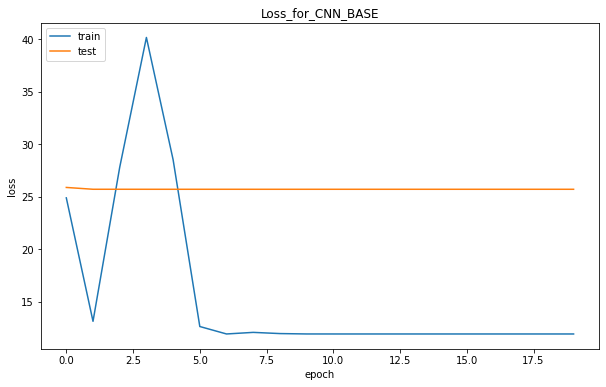

Mean squared error on test is: 21.158070036202663
MAE on test is: 2.2618845270910986
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 41)]           0         
                                                                 
 lstm (LSTM)                 (None, 1, 100)            56800     
                                                                 
 lstm_1 (LSTM)               (None, 10)                4440      
                                                                 
 dense (Dense)               (None, 256)               2816      
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 64,313
Trainable params: 64,313
Non-trainable params: 0
______________________________________

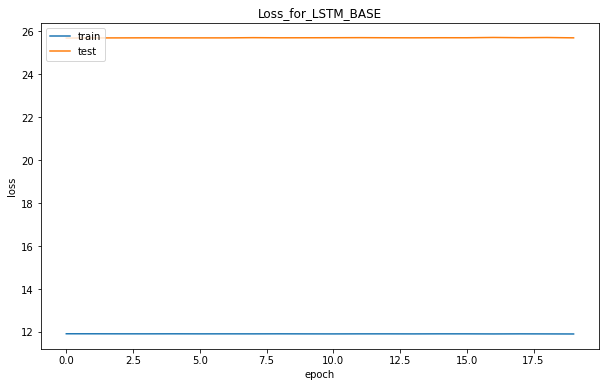

Mean squared error on test is: 21.15435821748113
MAE on test is: 2.2676357735634287
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 101)]          0         
                                                                 
 conv1d (Conv1D)             (None, 1, 64)             12992     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 64)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 32)             4128      
                                                                 
 dropout (Dropout)           (None, 1, 32)             0         
                                                                 
 flatten (Flatten)           (None, 32)  

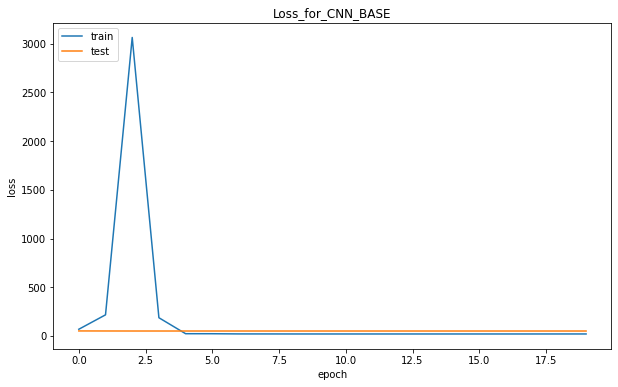

Mean squared error on test is: 41.92997194415769
MAE on test is: 3.0114691484758724
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 101)]          0         
                                                                 
 lstm (LSTM)                 (None, 1, 100)            80800     
                                                                 
 lstm_1 (LSTM)               (None, 10)                4440      
                                                                 
 dense (Dense)               (None, 256)               2816      
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 88,313
Trainable params: 88,313
Non-trainable params: 0
_______________________________________

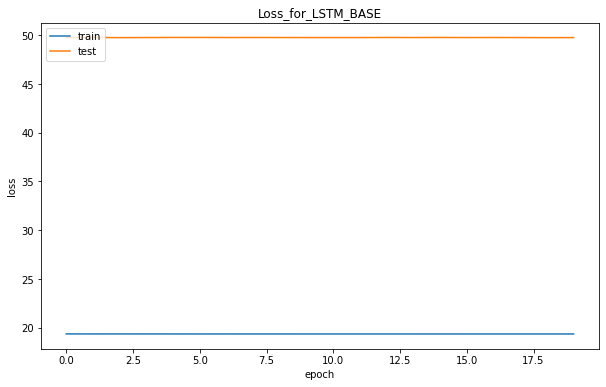

Mean squared error on test is: 41.930105318162674
MAE on test is: 3.0111721151589372


In [9]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras import backend as be
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.optimizers import Adam, SGD
import absl.logging
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, MaxPool2D, Flatten, Conv1D, MaxPool1D
from keras.layers.merge import concatenate
from tensorflow.keras.models import Model
from keras.constraints import maxnorm
from tensorflow.keras import initializers

be.clear_session()
tf.compat.v1.reset_default_graph()
report = pd.DataFrame(columns = ['epochs','batch_size','optimizer','activation',"Model",'Val_ms_error','Val_ma_error','Time_window'])
Time_windows = [5,15]
for i in Time_windows:
    n_steps = i-1
    batch_size = 100
    # leanring_rate = 0.
    epoch = 20
    X_train, y_train,X_valid, y_valid, X_test, y_test = load_data(i)
    n_features = X_train.shape[1]
    X_train = X_train.values.reshape(X_train.shape[0],1,n_features)
    X_valid = X_valid.values.reshape(X_valid.shape[0],1,n_features)
    X_test = X_test.values.reshape(X_test.shape[0],1,n_features)


    model = CNN_basemodel(n_features = n_features)
    model.compile(optimizer='adam', loss='mse')
    history = model.fit(X_train,y_train,validation_data = (X_valid, y_valid), 
                        batch_size = batch_size,epochs=epoch, verbose=1,shuffle = False)
    display_history(history,"CNN_BASE")
    
    mse_error, mae_error = evaluate_model(model,X_test,y_test)
    report.loc[len(report)] = [epoch,batch_size,"Adam","RELU","CNN_Basic",mse_error,mae_error,i]
    print("Mean squared error on test is: {}".format(mse_error))
    print("MAE on test is: {}".format(mae_error))
    
    model = LSTM_base(n_features = n_features)
    model.compile(optimizer='adam', loss='mse')
    history = model.fit(X_train,y_train,validation_data = (X_valid, y_valid), 
                        batch_size = batch_size,epochs=epoch, verbose=1,shuffle = False)
    display_history(history,"LSTM_BASE")
    mse_error, mae_error = evaluate_model(model,X_test,y_test)
    report.loc[len(report)] = [epoch,batch_size,"Adam","RELU","LSTM_Basic",mse_error,mae_error,i]
    print("Mean squared error on test is: {}".format(mse_error))
    print("MAE on test is: {}".format(mae_error))
    